# My First Adventure into Real World Data Analytics

I was fortunate enough to be a part of two open research groups as part of the Data Science and Analytics Unit at the Hayden Library at Arizona State University.

This project in particular was an opportunity of a lifetime to do two things I've always wanted to do: Improve my analytical skills through real life analysis, and do research on educational data. To be able to do these things with the guidance and mentorship of incredible Analysts and Data Scientists at the Hayden Library was an incredible gift and I thank them for all of their effort in providing such a resource to students. 

While this analysis was challenging, messy, and certainly not perfect, I can confidently say that I am a better Analyst because of it. I am using this notebook as a reflection on the lessons that I learned and the mistakes that I made. I hope you enjoy some of the insights, consider what could be done further, and forgive me for my mistakes! 




# Initial Setup
The first step is setting our data up for analysis, as well as a quick exploratory analysis. 

In [1]:
%pip install numpy
%pip install pandas
%pip install pyxlsb         #This lets Python read .xlsb files, you only need to run it once
%pip install matplotlib
%pip install scipy
%pip install seaborn
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install plotly
%pip install --upgrade nbformat



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importing the Pandas package and giving it a shorter alias to use throughout our codes
import pandas as pd

In [4]:
# Initializing a variable that contains the URL to download our data
data_url = "https://github.com/UnitForDataScience/Projects-Fall-2024/raw/refs/heads/main/School%20Funding%20in%20the%20Spotlight/Data/DistrictCostDatabase_2024.xlsb"

# Reading the data into a Pandas dataframe, this will allow us to parse the data later on
df = pd.read_excel(data_url, engine='pyxlsb')


# Basic Exploratory Analysis

## Viewing the top 5 rows

In [5]:
#Print the first 5 rows as they appear on the file, if we want less or more rows, enter the number as a parameter
print(df.head())

   year   leaid          district state_name stabbr  ppcstot  predcost  \
0  2009  100005  ALBERTVILLE CITY    Alabama     AL     8608     12557   
1  2010  100005  ALBERTVILLE CITY    Alabama     AL     8688     12567   
2  2011  100005  ALBERTVILLE CITY    Alabama     AL     8492     11509   
3  2012  100005  ALBERTVILLE CITY    Alabama     AL     8157     15540   
4  2013  100005  ALBERTVILLE CITY    Alabama     AL     8069     14412   

   fundinggap  outcomegap  enroll       pov       iep       ell     amind  \
0       -3949   -0.373566    3849  0.302567  0.009353  0.204729  0.001823   
1       -3879   -0.216288    4104  0.334258  0.074561  0.197856  0.001467   
2       -3017   -0.190391    4143  0.339477  0.063481  0.144340  0.000483   
3       -7383   -0.117687    4140  0.444417  0.075604  0.143720  0.001208   
4       -6343   -0.278603    4422  0.389776  0.071009  0.160271  0.001583   

      asian     black      hisp     multi       pac     white  
0  0.004427  0.022917  0.317

## Data Dictionary

For quick reference, here is our dictionary:

- year: Year of data (year is the spring semester of the school year—e.g., 2021 is 2020-21)

- leaid: NCES district identification number

- district: District name

- state_name: State

- stabbr: State two-letter abbreviation

- ppcstot: Actual spending per-pupil

- predcost: Required (adequate) spending per-pupil

- fundinggap: Gap between actual and required spending per-pupil

- outcomegap: Gap between district and U.S. average test scores (s.d.)

- enroll: Total student enrollment

- pov: Census child (5-17 year old) poverty rate

- iep: Percent special education students

- ell: Percent English language learners

- amind: Percent American Indian/Alaska Native students

- asian: Percent Asian students

- black: Percent Black students

- hisp: Percent Hispanic students

- multi: Percent multiracial ("two or more races") students

- pac: Percent Pacific Islander/Hawaii Native students

- white: Percent white students

## Info about our data

In [6]:
#Print technical information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159034 entries, 0 to 159033
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        159034 non-null  int64  
 1   leaid       159034 non-null  int64  
 2   district    159034 non-null  object 
 3   state_name  159034 non-null  object 
 4   stabbr      159034 non-null  object 
 5   ppcstot     159034 non-null  int64  
 6   predcost    159034 non-null  int64  
 7   fundinggap  159034 non-null  int64  
 8   outcomegap  113880 non-null  float64
 9   enroll      159034 non-null  int64  
 10  pov         159034 non-null  float64
 11  iep         155023 non-null  float64
 12  ell         157748 non-null  float64
 13  amind       159034 non-null  float64
 14  asian       159034 non-null  float64
 15  black       159034 non-null  float64
 16  hisp        159034 non-null  float64
 17  multi       139366 non-null  float64
 18  pac         136863 non-null  float64
 19  wh

# Descriptive Statistics

## Decriptive Statistics for the Whole Dataset

In [7]:
# Print descriptive stats for each column
print(df.describe())

                year         leaid        ppcstot       predcost  \
count  159034.000000  1.590340e+05  159034.000000  159034.000000   
mean     2014.946370  3.012129e+06   12254.636625   11703.865570   
std         3.738836  1.470075e+06    4572.360238    6247.861275   
min      2009.000000  1.000050e+05     251.000000    3282.000000   
25%      2012.000000  1.808010e+06    9216.000000    7991.000000   
50%      2015.000000  3.028911e+06   10931.000000   10098.000000   
75%      2018.000000  4.104590e+06   13981.000000   13305.750000   
max      2021.000000  5.606240e+06  130849.000000   94853.000000   

          fundinggap     outcomegap        enroll            pov  \
count  159034.000000  113880.000000  1.590340e+05  159034.000000   
mean      550.772099       0.024527  3.861922e+03       0.172366   
std      7433.439068       0.353197  1.518221e+04       0.095372   
min    -85859.000000      -3.797798  1.000000e+02       0.000000   
25%     -2412.000000      -0.194640  5.120000e+

## Descriptive Statistics for just Arizona

In [8]:
print(df[(df["stabbr"] == "AZ")].describe())

              year          leaid       ppcstot      predcost    fundinggap  \
count  2328.000000    2328.000000   2328.000000   2328.000000   2328.000000   
mean   2014.992698  404824.134021   9385.088488  13629.021478  -4243.931701   
std       3.749509    2838.305928   3293.838656   6124.058601   5348.038593   
min    2009.000000  400001.000000   5204.000000   4489.000000 -49389.000000   
25%    2012.000000  402400.000000   7289.000000   9399.500000  -6511.750000   
50%    2015.000000  404820.000000   8297.500000  12362.500000  -3203.000000   
75%    2018.000000  407240.000000  10331.500000  16192.250000   -866.500000   
max    2021.000000  409733.000000  30294.000000  63271.000000  11706.000000   

        outcomegap        enroll          pov          iep          ell  \
count  1645.000000   2328.000000  2328.000000  2324.000000  2328.000000   
mean     -0.302901   5219.743127     0.251643     0.134984     0.075338   
std       0.386482   9231.949240     0.112301     0.041219     

# Data Visualization

## Setup

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## Box Plot

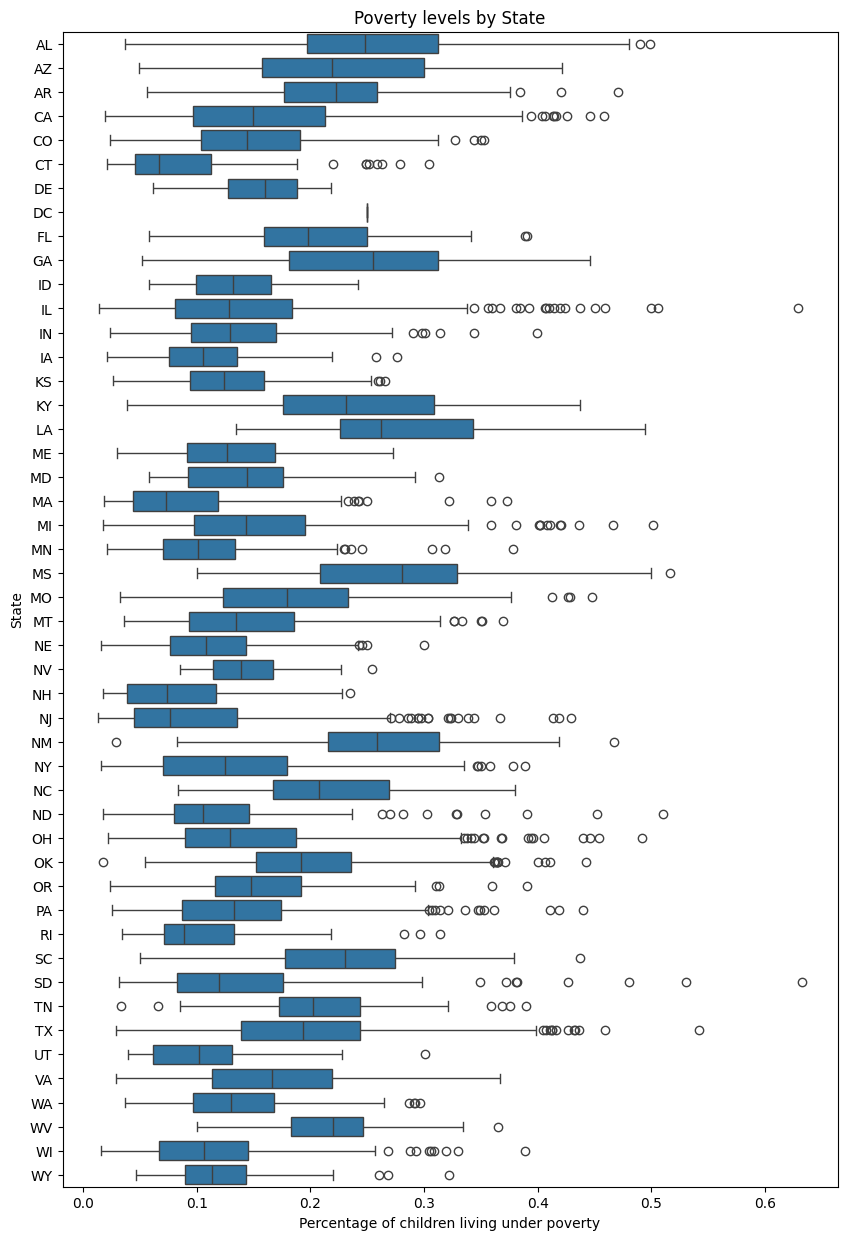

In [10]:
# Create a variable to filter the dataset by any year of interest
df_year = df[df['year'] == 2021]                    

# We specify a size for our figure, and then construct a boxplot. Here we are looking at the
plt.figure(figsize=(10, 15))                        

# You can change the size
sns.boxplot(data=df_year, x="pov", y="stabbr")     # You can change the values of x and/or y for variables that interest you

# Label our axes and title
plt.xlabel("Percentage of children living under poverty")
plt.ylabel("State")
plt.title("Poverty levels by State")


#Print the plot
plt.show()

## Histograms

### For the whole dataset in 2021

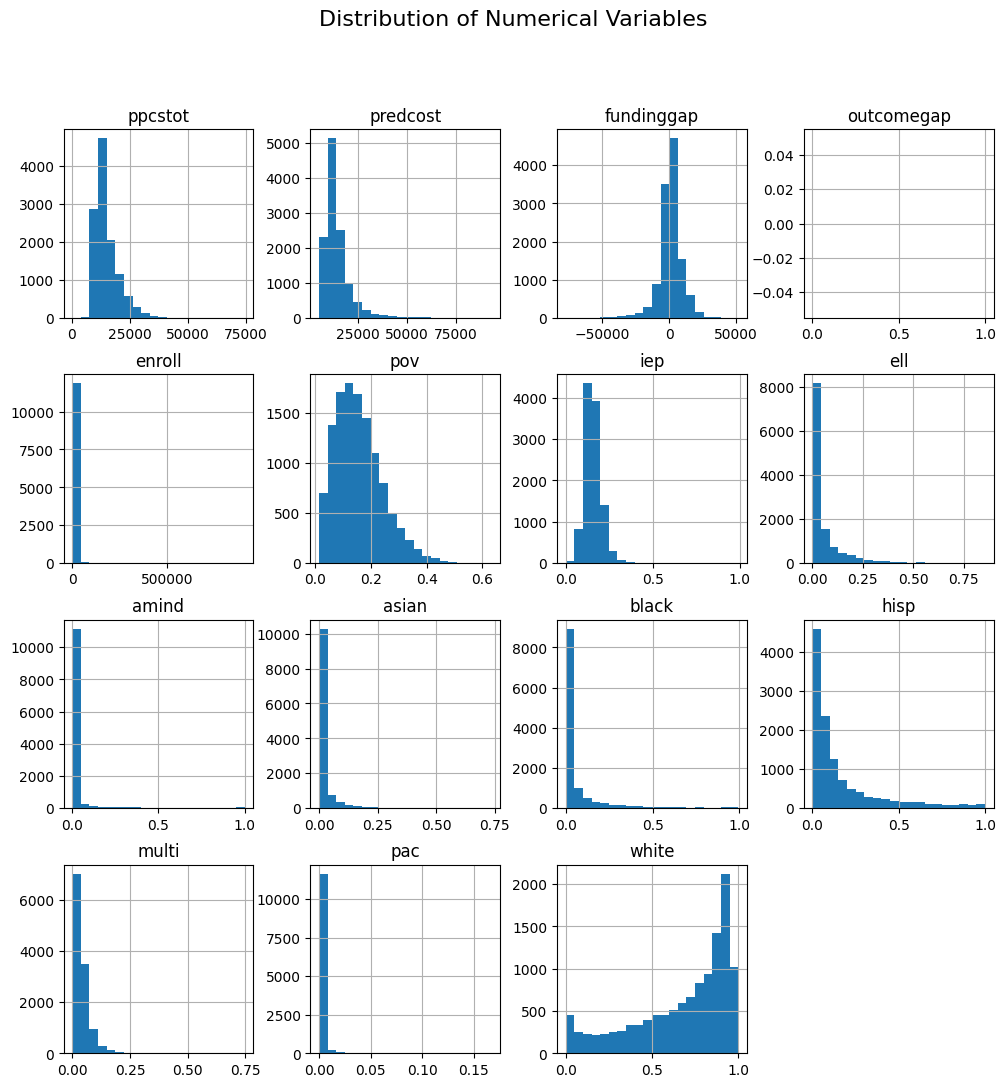

In [ ]:
# Plot histograms for all numerical columns
df_hplot = df[(df['year'] == 2021)].drop(columns=["year", "leaid"]) # This new variable that will help us create histograms  from the histograms
df_hplot.hist(figsize=(12, 12), bins=20)                                                     # This will generate the histogram for all numerical variables, feel free to change the number of "bins"
plt.suptitle('Distribution of Numerical Variables', fontsize=16)

#Print the plot
plt.show()

### For Arizona in 2021

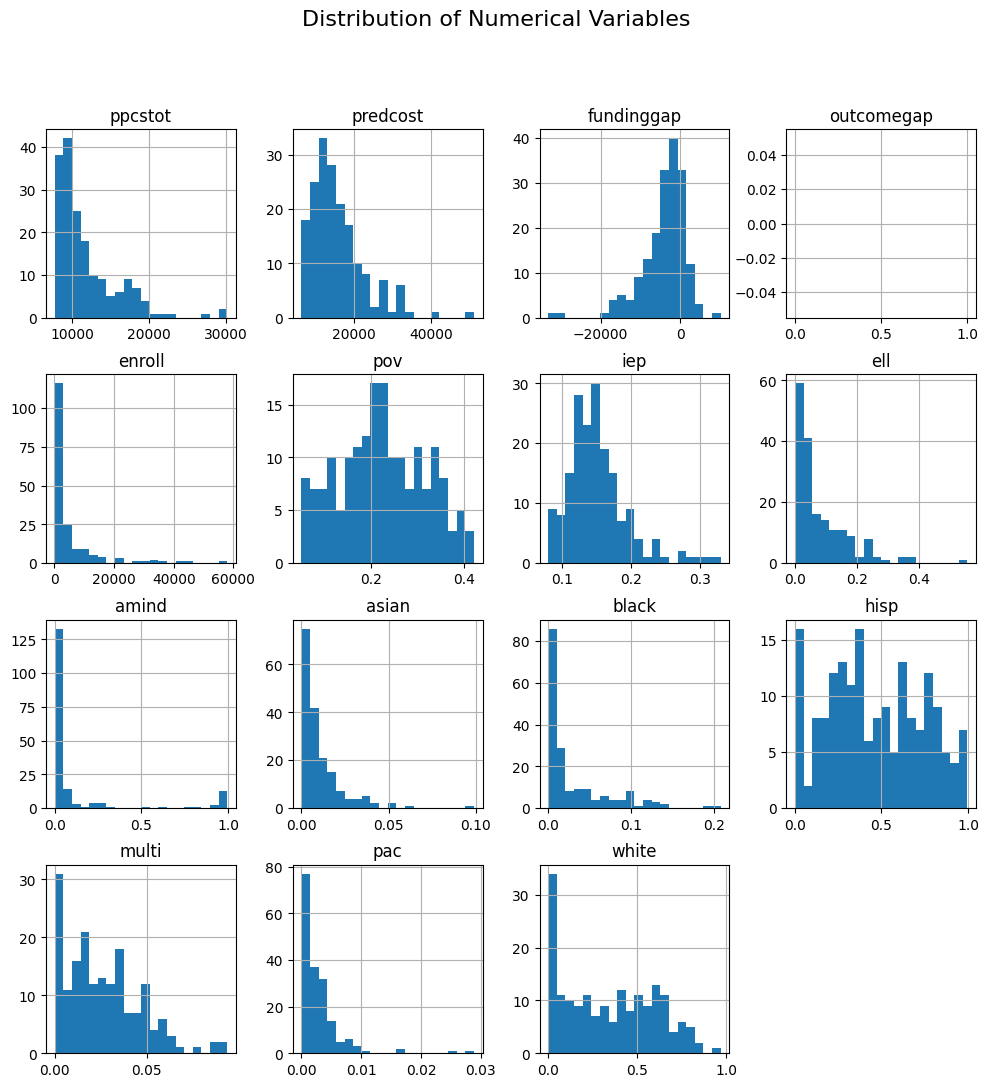

In [ ]:
# Plot histograms for all numerical columns
df_hplot = df[(df["stabbr"] == "AZ") & (df['year'] == 2021)].drop(columns=["year", "leaid"]) # This new variable that will help us create histograms  from the histograms
df_hplot.hist(figsize=(12, 12), bins=20)                                                     # This will generate the histogram for all numerical variables, feel free to change the number of "bins"
plt.suptitle('Distribution of Numerical Variables', fontsize=16)

#Print the plot
plt.show()

### For Just funding gap, in Arizona, for 2021

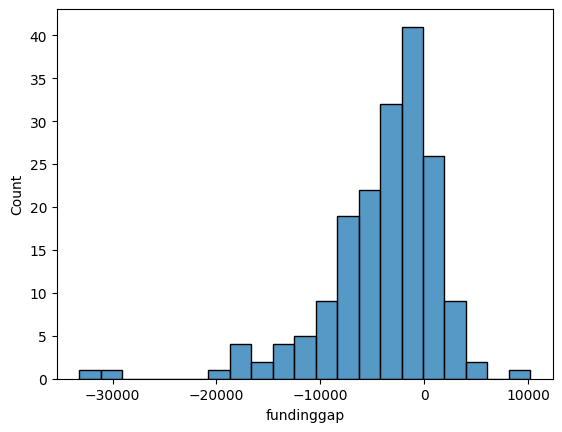

In [13]:
# Histogram for only one variable

sns.histplot(df[(df["stabbr"] == "AZ") & (df['year'] == 2021)], x='fundinggap', bins='auto')
plt.show()

## Interactive Plots

### Bubble Plot

In [14]:
#We begin by importing plotly.express as px
import plotly.express as px

# Lets create a condition to filter our data once again
df_bubplot = df[(df["stabbr"] == "AZ") & (df['year'] == 2021)]

# Create an interactive scatter plot
fig = px.scatter(df_bubplot,
                 x="pov",
                 y="ppcstot",
                 size="enroll",
                 size_max=70,
                 color="enroll",                  # Both the color and size of the bubblues will reference the total enrollment of each district
                 hover_name="district")


# Customize and show the plot
fig.update_layout(title='Interactive Plot')
fig.show()

In [15]:
#We will use a boolean to create a "state" variable, let's look at AZ
df_state = df[df['stabbr'] == "AZ"]

# Create an interactive scatter plot
fig = px.scatter(df_state,
                 x="pov",
                 y="ppcstot",
                 size="enroll",
                 size_max=70,
                 animation_frame="year",         # This will allow us to animate by year
                 animation_group="district",      # This plots each district separately
                 color="enroll",                  # # Both the color and size of the bubblues will reference the total enrollment of each district
                 hover_name="district",
                 range_y=[100,35000])

# Customize and show the plot
fig.update_layout(title='Interactive Plot: Percent of children living in poverty vs spending per pupil')
fig.show()

# My Deeper Analaysis
After exploring the data, and discussing with others in the group, I decided to focus on both differences between Arizona and another state (I chose my home state of NY) as well as data involving IEP students. 

## New York vs Arizona: Funding Gaps

**Fundinggap** represents the gap between actual and required spending per-pupil. Schools above 0 on the graph below spend more then the required amount per student, while schools under 0 spend less than the required amount. 

The 2 graphs below demonstrate a stark difference in the typical funding levels of schools in New York (in orange) vs Arizona (in blue). As someone who went to school in New York and worked at a school in Arizona, I can tell you anecdotally I have seen the funding gap difference first hand. 

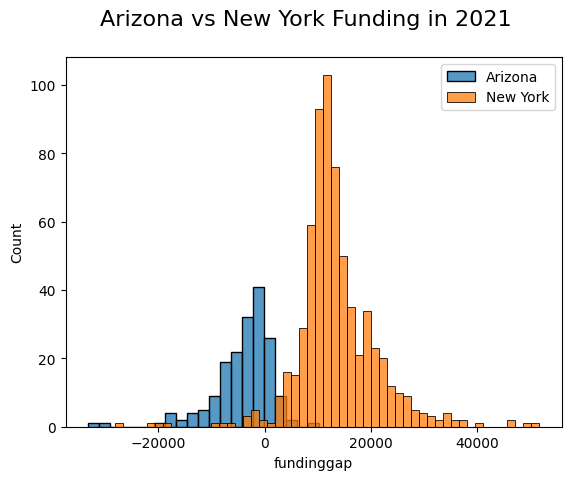

In [16]:
sns.histplot(df[(df["stabbr"] == "AZ") & (df['year'] == 2021)], x='fundinggap', bins='auto', label="Arizona")
sns.histplot(df[(df["stabbr"] == "NY") & (df['year'] == 2021)], x='fundinggap', bins='auto', label="New York")
plt.suptitle('Arizona vs New York Funding in 2021', fontsize=16)
plt.legend(loc='upper right')
plt.show()

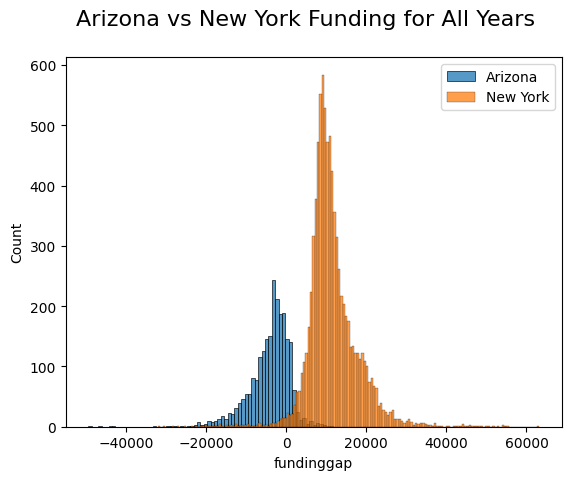

In [17]:
sns.histplot(df[(df["stabbr"] == "AZ")], x='fundinggap', bins='auto', label="Arizona")
sns.histplot(df[(df["stabbr"] == "NY")], x='fundinggap', bins='auto', label="New York")
plt.suptitle('Arizona vs New York Funding for All Years', fontsize=16)
plt.legend(loc='upper right')
plt.show()

This funding gap difference for all years looks extremely similar in distribution to that of 2021, suggesting that this trend is consistent across the data. This gap could be explained by different approaches to funding from Arizona and New York, as well as the relative wealth of the New York economy relative to that of Arizona. 

Examining this difference further would require additional data on the specifics of how Arizona and New York fund their schools, which is beyond the scope of our dataset. 


## Investigating IEP Data
I have spent a lot of time working with IEP students both in and outside of the classroom in various capacities. This history is what led me to looking further into the available data in regards to IEP students. 

I tried various approaches to analyze how IEP rates, which represents the percentage of students at a school that have an IEP, correlate with other variables. 

I started with a simple correlation to see if I could find anything easily. 

In [18]:
# Calculate the correlation between IEP percentage and funding gap
correlation = df['iep'].corr(df['fundinggap'])
print(f"Correlation between IEP percentage and funding gap: {correlation}")

Correlation between IEP percentage and funding gap: 0.06133370026980158


In [34]:
df['fundinggap'].mean()

np.float64(592.5563154699629)

In [35]:
df['outcomegap'].mean()

np.float64(0.026602005773141462)

In [36]:
df['iep'].mean()

np.float64(0.14272841897934668)

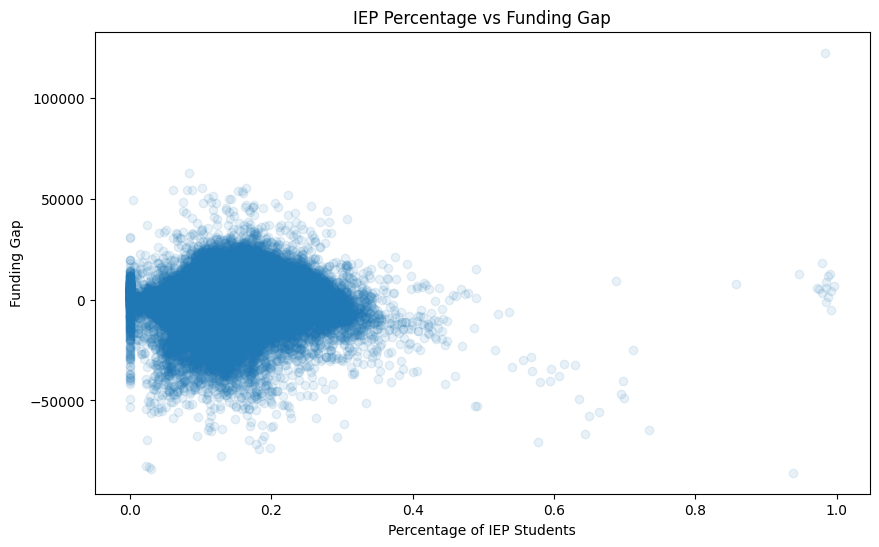

In [ ]:
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(df['iep'], df['fundinggap'], alpha=0.1)
plt.xlabel('Percentage of IEP Students')
plt.ylabel('Funding Gap')
plt.title('IEP Percentage vs Funding Gap')
plt.show()

## Data Cleaning

This is the point where I realized I will need to do some data cleaning. Besides dropping nulls, I also got rid of values of IEP above 35% as well as funding gaps equal or above to 100000 as these categories would be considered extreme outliers in our data.

One major mistake I made during my analysis was not taking the time to do a "cleaning" stage before analysis. I repeat my data cleaning through multiple instances of code even when that data has been cleaned identically before. This was one of the biggest lessons that I took away from this analysis. 

## Initial Investigation: Funding gap and IEP levels

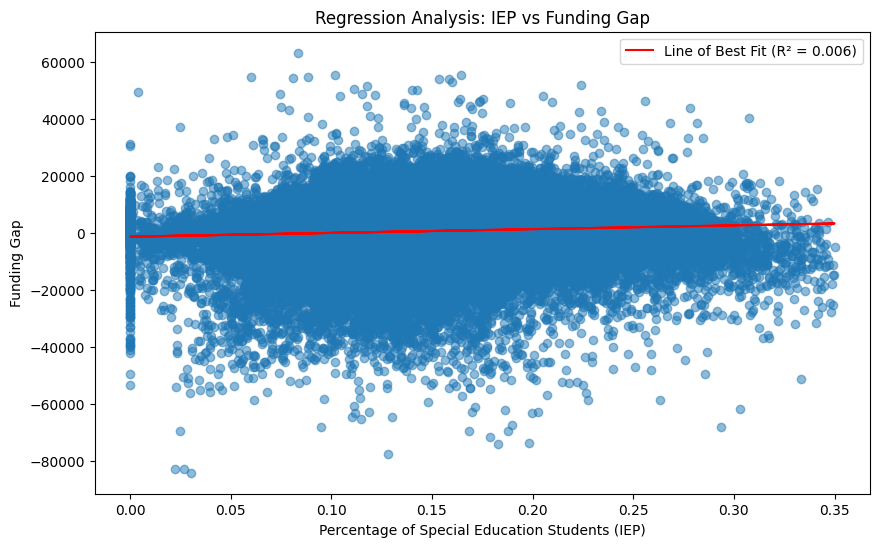

Slope: 13192.2754
Intercept: -1290.3563
R-squared: 0.0063
P-value: 0.0000


In [22]:
from scipy.stats import linregress

# Remove rows with missing values
df = df.dropna(subset=['iep', 'fundinggap'])

df = df[(df['iep'] <= 0.35) & (df['fundinggap'] <= 100000)]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['iep'], df['fundinggap'], alpha=0.5)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = linregress(df['iep'], df['fundinggap'])
line = slope * df['iep'] + intercept

# Plot the line of best fit
plt.plot(df['iep'], line, color='red', label=f'Line of Best Fit (R² = {r_value**2:.3f})')

# Customize the plot
plt.xlabel('Percentage of Special Education Students (IEP)')
plt.ylabel('Funding Gap')
plt.title('Regression Analysis: IEP vs Funding Gap')
plt.legend()

# Show the plot
plt.show()

# Print regression statistics
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")


Average IEP percentage by funding gap quartile:
funding_gap_quartile
Q1    0.141640
Q2    0.140585
Q3    0.138084
Q4    0.150606
Name: iep, dtype: float64


/var/folders/kh/mj1vd1cs1sb5v27d3qqlbpw40000gn/T/ipykernel_42359/668692221.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



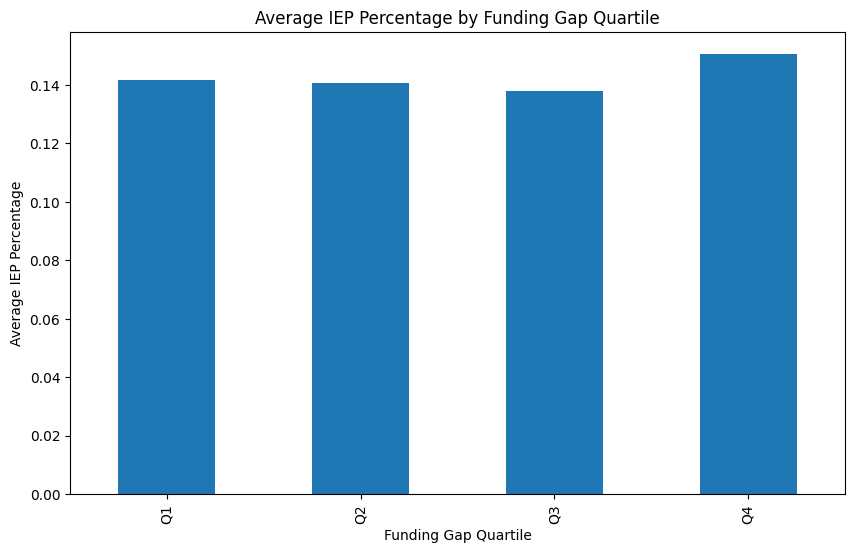

In [23]:
# Group schools by funding gap quartiles
df['funding_gap_quartile'] = pd.qcut(df['fundinggap'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Calculate average IEP percentage for each funding gap quartile
avg_iep_by_quartile = df.groupby('funding_gap_quartile')['iep'].mean()

print("\nAverage IEP percentage by funding gap quartile:")
print(avg_iep_by_quartile)

# Create bar plot
plt.figure(figsize=(10, 6))
avg_iep_by_quartile.plot(kind='bar')
plt.xlabel('Funding Gap Quartile')
plt.ylabel('Average IEP Percentage')
plt.title('Average IEP Percentage by Funding Gap Quartile')
plt.show()

## A different Direction: Outcome gap

There doesn't appear to be anything standing out yet. I decided to look instead at outcome gaps, or the gap between district and U.S. average test scores (s.d.). 

To accomplish this, I made some simple groupings that I could compare. While my naming was ... less than ideal, I broke the groups into high IEP (schools with IEP rates above the median), low IEP (schools with IEP rates below the median), large_gap (schools with funding gaps above the median). and small_gap (schools with funding gaps below the median). 

This is where I also made another big mistake in not being consistent with my groupings. At the time that was because I was trying to better understand how to best use the data, but in hindsight it impacted my analysis by leaving inconsistencies. In the future, I will separate any kind of exploration and data cleaning from the final analysis, unless that exploration is vital to the final product. 


Average outcome gap by group:
group
Low IEP, High Funding Gap    -0.165496
High IEP, High Funding Gap   -0.159569
High IEP, Low Funding Gap     0.178885
Low IEP, Low Funding Gap      0.243327
Name: outcomegap, dtype: float64


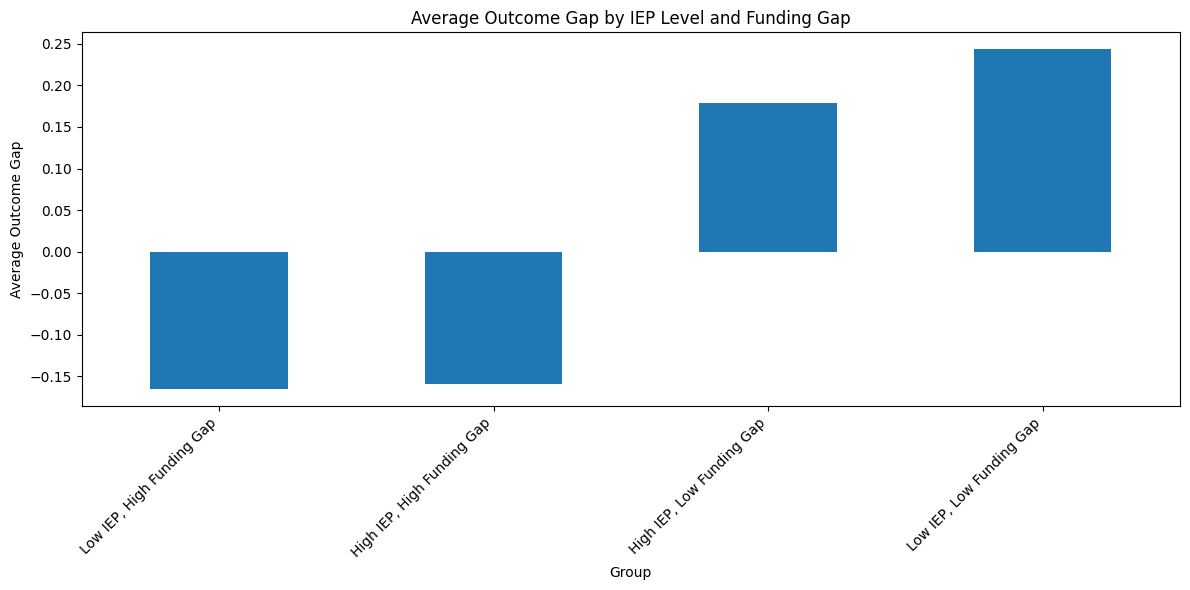

In [27]:
import numpy as np

# Create binary variables for high/low IEP and funding gap
df['high_iep'] = df['iep'] > df['iep'].mean()
df['high_fundinggap'] = df['fundinggap'] < df['fundinggap'].mean()

# Create groups based on IEP levels and funding gaps
df['group'] = np.select([
    (df['high_iep'] == False) & (df['high_fundinggap'] == True),
    (df['high_iep'] == False) & (df['high_fundinggap'] == False),
    (df['high_iep'] == True) & (df['high_fundinggap'] == True),
    (df['high_iep'] == True) & (df['high_fundinggap'] == False)
], [
    'Low IEP, High Funding Gap',
    'Low IEP, Low Funding Gap',
    'High IEP, High Funding Gap',
    'High IEP, Low Funding Gap'
], default='')

# Calculate average outcome gap for each group
avg_outcomegap_by_group = df.groupby('group')['outcomegap'].mean().sort_values()

print("\nAverage outcome gap by group:")
print(avg_outcomegap_by_group)

# Create bar plot
plt.figure(figsize=(12, 6))
avg_outcomegap_by_group.plot(kind='bar')
plt.xlabel('Group')
plt.ylabel('Average Outcome Gap')
plt.title('Average Outcome Gap by IEP Level and Funding Gap')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
# Define threshold for 'high' and 'low' IEP percentage (e.g., median split)
iep_threshold = df['iep'].median()

# Create two groups: high IEP and low IEP
high_iep = df[df['iep'] > iep_threshold]
low_iep = df[df['iep'] <= iep_threshold]

# Calculate average actual spending per pupil for both groups
avg_funding_high_iep = high_iep['ppcstot'].mean()
avg_funding_low_iep = low_iep['ppcstot'].mean()

print(f"Average funding per pupil (high IEP): {avg_funding_high_iep}")
print(f"Average funding per pupil (low IEP): {avg_funding_low_iep}")

# 2. Do schools with larger funding gaps have smaller populations of IEP students?

# Define threshold for 'large' and 'small' funding gap (e.g., median split)
funding_gap_threshold = df['fundinggap'].median()

# Create two groups: large funding gap and small funding gap
large_gap = df[df['fundinggap'] > funding_gap_threshold]
small_gap = df[df['fundinggap'] <= funding_gap_threshold]

# Calculate average percentage of IEP students for both groups
avg_iep_large_gap = large_gap['iep'].mean()
avg_iep_small_gap = small_gap['iep'].mean()

print(f"Average IEP percentage (large funding gap): {avg_iep_large_gap}")
print(f"Average IEP percentage (small funding gap): {avg_iep_small_gap}")

# 3. Outcome gap comparison based on different combinations of IEP levels and funding gaps

# Define high/low thresholds for both IEP and funding gap
high_iep_threshold = df['iep'].median()
high_funding_gap_threshold = df['fundinggap'].median()

# Create four groups:
# 1) Low IEP, High Funding Gap
group1 = df[(df['iep'] <= high_iep_threshold) & (df['fundinggap'] > high_funding_gap_threshold)]

# 2) Low IEP, Low Funding Gap
group2 = df[(df['iep'] <= high_iep_threshold) & (df['fundinggap'] <= high_funding_gap_threshold)]

# 3) High IEP, High Funding Gap
group3 = df[(df['iep'] > high_iep_threshold) & (df['fundinggap'] > high_funding_gap_threshold)]

# 4) High IEP, Low Funding Gap
group4 = df[(df['iep'] > high_iep_threshold) & (df['fundinggap'] <= high_funding_gap_threshold)]

# Calculate average outcome gap for each group
outcome_gap_group1 = group1['outcomegap'].mean()
outcome_gap_group2 = group2['outcomegap'].mean()
outcome_gap_group3 = group3['outcomegap'].mean()
outcome_gap_group4 = group4['outcomegap'].mean()

print(f"Outcome gap (Low IEP, High Funding Gap): {outcome_gap_group1}")
print(f"Outcome gap (Low IEP, Low Funding Gap): {outcome_gap_group2}")
print(f"Outcome gap (High IEP, High Funding Gap): {outcome_gap_group3}")
print(f"Outcome gap (High IEP, Low Funding Gap): {outcome_gap_group4}")

Average funding per pupil (high IEP): 13364.079488504263
Average funding per pupil (low IEP): 11139.016881506548
Average IEP percentage (large funding gap): 0.14434436180714333
Average IEP percentage (small funding gap): 0.14111272659795676
Outcome gap (Low IEP, High Funding Gap): 0.25659083393414145
Outcome gap (Low IEP, Low Funding Gap): -0.15615574889669165
Outcome gap (High IEP, High Funding Gap): 0.18711016680330567
Outcome gap (High IEP, Low Funding Gap): -0.14928967846428298


After trying this analysis with the median, I also explored other ways of seperating IEP students.

### .05% IEP

In [37]:
# 1) Low IEP, Positive Funding Gap
group1 = df[(df['iep'] <= 0.05) & (df['fundinggap'] >= 0)]

# 2) Low IEP, Negative Funding Gap
group2 = df[(df['iep'] <= 0.05) & (df['fundinggap'] < 0)]

# 3) High IEP, Positive Funding Gap
group3 = df[((df['iep'] > 0.05) & (df['iep'] <.35)) & (df['fundinggap'] >= 0)]

# 4) High IEP, Negative Funding Gap
group4 = df[((df['iep'] > 0.05) & (df['iep'] <.35)) & (df['fundinggap'] < 0)]

# Calculate average outcome gap for each group
outcome_gap_group1 = group1['outcomegap'].mean()
outcome_gap_group2 = group2['outcomegap'].mean()
outcome_gap_group3 = group3['outcomegap'].mean()
outcome_gap_group4 = group4['outcomegap'].mean()

print(f"Outcome gap (Low IEP, Positive Funding Gap): {outcome_gap_group1}")
print(f"Outcome gap (Low IEP, Negative Funding Gap): {outcome_gap_group2}")
print(f"Outcome gap (High IEP, Positive Funding Gap): {outcome_gap_group3}")
print(f"Outcome gap (High IEP, Negative Funding Gap): {outcome_gap_group4}")

Outcome gap (Low IEP, Positive Funding Gap): 0.05605772133333334
Outcome gap (Low IEP, Negative Funding Gap): -0.34386618744525554
Outcome gap (High IEP, Positive Funding Gap): 0.1941678088323009
Outcome gap (High IEP, Negative Funding Gap): -0.18474071412695078


### Mean IEP

In [38]:
# 1) Low IEP, Positive Funding Gap
group1 = df[(df['iep'] <= df['iep'].mean()) & (df['fundinggap'] >= 0)]

# 2) Low IEP, Negative Funding Gap
group2 = df[(df['iep'] <= df['iep'].mean()) & (df['fundinggap'] < 0)]

# 3) High IEP, Positive Funding Gap
group3 = df[((df['iep'] > df['iep'].mean()) & (df['iep'] <.35)) & (df['fundinggap'] >= 0)]

# 4) High IEP, Negative Funding Gap
group4 = df[((df['iep'] > df['iep'].mean()) & (df['iep'] <.35)) & (df['fundinggap'] < 0)]

# Calculate average outcome gap for each group
outcome_gap_group1 = group1['outcomegap'].mean()
outcome_gap_group2 = group2['outcomegap'].mean()
outcome_gap_group3 = group3['outcomegap'].mean()
outcome_gap_group4 = group4['outcomegap'].mean()

print(f"Outcome gap (Low IEP, Positive Funding Gap): {outcome_gap_group1}")
print(f"Outcome gap (Low IEP, Negative Funding Gap): {outcome_gap_group2}")
print(f"Outcome gap (High IEP, Positive Funding Gap): {outcome_gap_group3}")
print(f"Outcome gap (High IEP, Negative Funding Gap): {outcome_gap_group4}")


Outcome gap (Low IEP, Positive Funding Gap): 0.2210064588783561
Outcome gap (Low IEP, Negative Funding Gap): -0.19051606399356535
Outcome gap (High IEP, Positive Funding Gap): 0.16243608434916137
Outcome gap (High IEP, Negative Funding Gap): -0.18201482296742244


### above .3 IEP

In [39]:
# 1) Low IEP, Positive Funding Gap
group1 = df[(df['iep'] <= 0.3
             ) & (df['fundinggap'] >= 0)]

# 2) Low IEP, Negative Funding Gap
group2 = df[(df['iep'] <= 0.3) & (df['fundinggap'] < 0)]

# 3) High IEP, Positive Funding Gap
group3 = df[((df['iep'] > 0.3) & (df['iep'] <.35)) & (df['fundinggap'] >= 0)]

# 4) High IEP, Negative Funding Gap
group4 = df[((df['iep'] > 0.3) & (df['iep'] <.35)) & (df['fundinggap'] < 0)]

# Calculate average outcome gap for each group
outcome_gap_group1 = group1['outcomegap'].mean()
outcome_gap_group2 = group2['outcomegap'].mean()
outcome_gap_group3 = group3['outcomegap'].mean()
outcome_gap_group4 = group4['outcomegap'].mean()

print(f"Outcome gap (Low IEP, Positive Funding Gap): {outcome_gap_group1}")
print(f"Outcome gap (Low IEP, Negative Funding Gap): {outcome_gap_group2}")
print(f"Outcome gap (High IEP, Positive Funding Gap): {outcome_gap_group3}")
print(f"Outcome gap (High IEP, Negative Funding Gap): {outcome_gap_group4}")


Outcome gap (Low IEP, Positive Funding Gap): 0.19342509902168037
Outcome gap (Low IEP, Negative Funding Gap): -0.18677299627713892
Outcome gap (High IEP, Positive Funding Gap): 0.2162931194230769
Outcome gap (High IEP, Negative Funding Gap): -0.24777925094594594


In [29]:
iep_threshold

np.float64(0.1396731)

In [30]:
funding_gap_threshold

np.float64(841.0)

## Outcome Gap, Funding Gap, and IEP

We can start to see a correlation, where schools that have "Low" funding gaps, in this case meaning below the median funding gap of 841 (including schools with negative gaps), tend to have negative outcome gaps while schools with "High" funding gaps (gaps abvoe 841) tend to have positive outcome gaps irrespecitve of the level of IEP

I decided to use .3 as the cutoff for high or low IEP, as that is close to the cutoff of an expected IEP rate at a school. Again we see some evidence of that positive funding gaps are correlated to some degree with positive outcomes, irrespective of the level of IEP. 

While it could seem obvious that schools that spend more per student do better, it is important to note that it is true even if the school has a large percentage of IEP students. 

In [31]:
# 1) Low IEP, Positive Funding Gap
group1 = df[(df['iep'] <= 0.3) & (df['fundinggap'] >= 0)]

# 2) Low IEP, Negative Funding Gap
group2 = df[(df['iep'] <= 0.3) & (df['fundinggap'] < 0)]

# 3) High IEP, Positive Funding Gap
group3 = df[(df['iep'] > 0.3) & (df['fundinggap'] >= 0)]

# 4) High IEP, Negative Funding Gap
group4 = df[(df['iep'] > 0.3) & (df['fundinggap'] < 0)]

# Calculate average outcome gap for each group
outcome_gap_group1 = group1['outcomegap'].mean()
outcome_gap_group2 = group2['outcomegap'].mean()
outcome_gap_group3 = group3['outcomegap'].mean()
outcome_gap_group4 = group4['outcomegap'].mean()

print(f"Outcome gap (Low IEP, Positive Funding Gap): {outcome_gap_group1}")
print(f"Outcome gap (Low IEP, Negative Funding Gap): {outcome_gap_group2}")
print(f"Outcome gap (High IEP, Positive Funding Gap): {outcome_gap_group3}")
print(f"Outcome gap (High IEP, Negative Funding Gap): {outcome_gap_group4}")


Outcome gap (Low IEP, Positive Funding Gap): 0.19342509902168037
Outcome gap (Low IEP, Negative Funding Gap): -0.18677299627713892
Outcome gap (High IEP, Positive Funding Gap): 0.2162931194230769
Outcome gap (High IEP, Negative Funding Gap): -0.24777925094594594


## An Accidental Find: IEP students vs Outcome Gap

I was thinking about splitting IEP into groups based on value, and using that for another branch of analysis. I immediately noticed a trend that I thought to visualize. 


In [53]:
# Define your ranges as tuples (lower_bound, upper_bound)
iep_ranges = [(0.001, 0.099), (0.1, 0.149), (0.15, 0.199), (0.2, 0.249), (0.25, 0.299), (0.3, 0.349), (0.35, 0.399)]

# Calculate mean for each range
for lower, upper in iep_ranges:
    mean_gap = df[(df['iep'] > lower) & (df['iep'] <= upper)]['outcomegap'].mean()
    print(f"IEP range {lower}-{upper}: {mean_gap}")

IEP range 0.001-0.099: 0.003142954469209274
IEP range 0.1-0.149: 0.04303663566387147
IEP range 0.15-0.199: 0.03867225694843104
IEP range 0.2-0.249: -0.04401270650132861
IEP range 0.25-0.299: -0.1269199866427932
IEP range 0.3-0.349: -0.12287510934343436
IEP range 0.35-0.399: nan


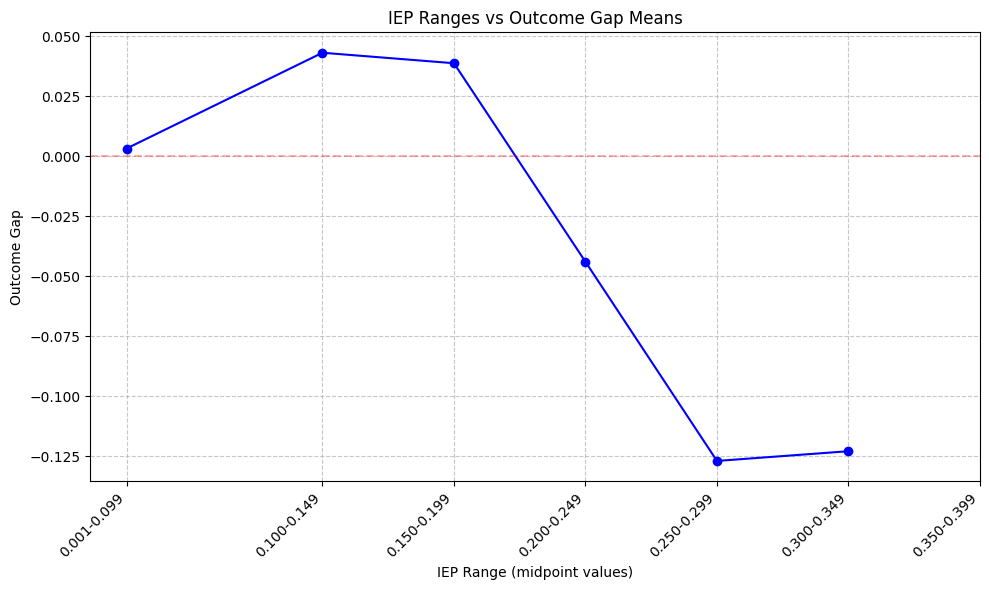

In [54]:
# Define your ranges as tuples (lower_bound, upper_bound)
iep_ranges = [(0.001, 0.099), (0.1, 0.149), (0.15, 0.199), (0.2, 0.249), 
              (0.25, 0.299), (0.3, 0.349), (0.35, 0.399)]

# Calculate mean for each range and store in a list
outcomegap_means = []
range_labels = []

for lower, upper in iep_ranges:
    mean_gap = df[(df['iep'] > lower) & (df['iep'] <= upper)]['outcomegap'].mean()
    outcomegap_means.append(mean_gap)
    range_labels.append(f"{lower:.3f}-{upper:.3f}")

# Calculate midpoints for plotting
midpoints = [(lower + upper) / 2 for lower, upper in iep_ranges]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(midpoints, outcomegap_means, marker='o', linestyle='-', color='blue')

# Customize the plot
plt.title('IEP Ranges vs Outcome Gap Means', fontsize=12)
plt.xlabel('IEP Range (midpoint values)', fontsize=10)
plt.ylabel('Outcome Gap', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Set x-ticks to show the range labels
plt.xticks(midpoints, range_labels, rotation=45, ha='right')

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)

# Format the plot
plt.tight_layout()

# Display the plot
plt.show()


Schools that have higher rates of IEP seem to have worse outcomes. Lets look at Funding gaps as well. 

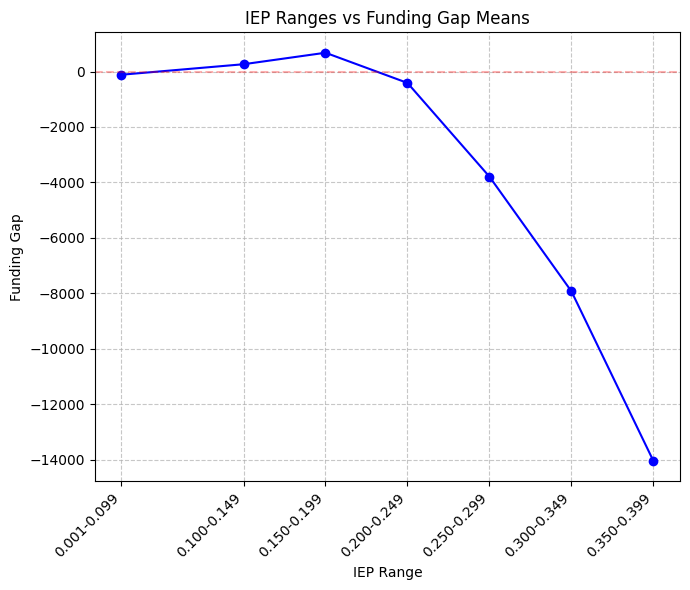

In [55]:
# Define IEP ranges as tuples (lower_bound, upper_bound)
iep_ranges = [(0.001, 0.099), (0.1, 0.149), (0.15, 0.199), (0.2, 0.249), 
              (0.25, 0.299), (0.3, 0.349), (0.35, 0.399)]

# Use existing funding gap means data
fundinggap_means = [-115.60518167792733, 263.11270351707896, 
                    677.5092289163375, -411.510524349234,
                    -3791.827079934747, -7927.134693877551,
                    -14044.485714285714]

# Calculate midpoints for plotting
midpoints = [(lower + upper) / 2 for lower, upper in iep_ranges]

# Create range labels for x-axis
range_labels = [f"{lower:.3f}-{upper:.3f}" for lower, upper in iep_ranges]

# Create the plot
plt.figure(figsize=(7, 6))
plt.plot(midpoints, fundinggap_means, marker='o', linestyle='-', color='blue')

# Customize the plot
plt.title('IEP Ranges vs Funding Gap Means', fontsize=12)
plt.xlabel('IEP Range', fontsize=10)
plt.ylabel('Funding Gap', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Set x-ticks to show the range labels
plt.xticks(midpoints, range_labels, rotation=45, ha='right')

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)

# Format the plot
plt.tight_layout()

# Display the plot
plt.show()


## Regression

Given the above analysis, I decided to see if I can determine any further relationships using Regression. 

There appears to be a strong negative correlation between the dependent outcome gap and the independent IEP rate. This appears to show that schools with higher IEP rates could have lower outcome gaps, meaning a larger negative distance between where the student is supposed to score and where they currently score. 


In [32]:
import statsmodels.api as sm

# Assuming df is your DataFrame containing 'iep', 'fundinggap', and 'outcomegap'

# Create a new DataFrame including only relevant columns
data = df[['iep', 'fundinggap', 'outcomegap']]

# Check for NaNs and infinite values
print("Number of NaNs in each column:")
print(data.isna().sum())
#print("\nNumber of infinite values in each column:")
#print(np.isinf(data).sum())3

# Remove rows with NaNs or infinite values
data_clean = data.replace([np.inf, -np.inf], np.nan).dropna()

# Define the independent variables (predictors)
X = data_clean[['iep', 'fundinggap']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Define the dependent variable (outcome)
y = data_clean['outcomegap']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the summary of the regression results
print(model.summary())

Number of NaNs in each column:
iep               0
fundinggap        0
outcomegap    42684
dtype: int64
                            OLS Regression Results                            
Dep. Variable:             outcomegap   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                 3.984e+04
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:02:56   Log-Likelihood:                -12157.
No. Observations:              112158   AIC:                         2.432e+04
Df Residuals:                  112155   BIC:                         2.435e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [33]:
# Create a new DataFrame including only relevant columns
data = df[['iep', 'fundinggap', 'outcomegap', 'predcost', 'ppcstot']]

# Check for NaNs and infinite values
print("Number of NaNs in each column:")
print(data.isna().sum())
print("\nNumber of infinite values in each column:")
print(np.isinf(data).sum())

# Remove rows with NaNs or infinite values
data_clean = data.replace([np.inf, -np.inf], np.nan).dropna()

# Define the independent variables (predictors)
X = data_clean[['iep', 'fundinggap','predcost', 'ppcstot']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Define the dependent variable (outcome)
y = data_clean['outcomegap']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the summary of the regression results
print(model.summary())

Number of NaNs in each column:
iep               0
fundinggap        0
outcomegap    42684
predcost          0
ppcstot           0
dtype: int64

Number of infinite values in each column:
iep           0
fundinggap    0
outcomegap    0
predcost      0
ppcstot       0
dtype: int64
                            OLS Regression Results                            
Dep. Variable:             outcomegap   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                 2.125e+04
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:07:34   Log-Likelihood:                -10620.
No. Observations:              112158   AIC:                         2.125e+04
Df Residuals:                  112153   BIC:                         2.130e+04
Df Model:                           4                                         
Covarianc

# Conclussion (and Post Mortem)

I learned so much through this analysis. About Python, educational data analysis, teamwork, communication, and even humility. When dealing with so much data, so many variables, and so many challenges, you are truly confronted with the gravity of what you do not know. But in analysis, like in life, you take things one step at a time and learn from your mistakes. My grand ambitions of finding conclusive and significant evidence might have been thwarted, but ultimately I learned an incredible amount. 

My analysis has shown that further research needs to be done into how school funding impacts student outcomes, specifically in schools that have a high amount of IEP students. As educational technology companies try to solve the "Individual Education for everyone" problem, it is important for us to understand how students who require individual attention are impacted and funded differently then a more general population. 

As far as what I have learned about data analysis, the biggest lessons are:
1. The best model in the world will never be 100% accurate. That is why domain expertise and experience is vital to any successful analysis. You will never know how correct your analysis is until you can demonstrate its validity through further research and experimentation. 
2. Python, or any tool, will only give you exactly what you ask for. That means if you ask for the wrong things, it will give them to you. The tool is only as good as the analyst, and the analyst is only as good as what they bring to the table that the tool does not already have. 
3. Separate data cleaning from the analysis. Even if they are in the same notebook, I ideally should clean my data first so that I have a single source of truth for my analysis.
4. One of the most important things I can do is name variables and other things in a way that make it intuitive to understand. Additionally, think about ways that I can normalize data to make it more intuitive to understand. High vs Low are relative terms, be more specific. 
5. Breathe. There is a reason we do analytics with computers, because there is simply too much data to calculate yourself. There will always be more data then you can handle, that is what makes good analysis great. 